In [13]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [15]:
import numpy 
import sys
import os
import tensorflow as tf

In [6]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [2]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수: %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))

학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


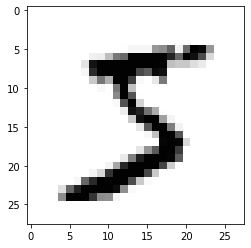

In [3]:
# 그래프로 확인
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="Greys")
plt.show()

In [7]:
# 코드로 확인 
for x in X_train[0]:
  for i in x:
    sys.stdout.write("%d\t"%i)
  sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [8]:
# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype("float64")
X_train = X_train / 255

In [9]:
X_test = X_test.reshape(X_test.shape[0], 784).astype("float64") / 255

In [10]:
print("class: %d " % (Y_class_train[0]))

class: 5 


In [12]:
# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [16]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# 모델 최적화 설정

MODEL_DIR = "./model/"
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [18]:
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

In [19]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])



Epoch 00001: val_loss improved from inf to 0.14746, saving model to ./model/01-0.1475.hdf5

Epoch 00002: val_loss improved from 0.14746 to 0.10211, saving model to ./model/02-0.1021.hdf5

Epoch 00003: val_loss improved from 0.10211 to 0.08862, saving model to ./model/03-0.0886.hdf5

Epoch 00004: val_loss improved from 0.08862 to 0.07862, saving model to ./model/04-0.0786.hdf5

Epoch 00005: val_loss improved from 0.07862 to 0.07436, saving model to ./model/05-0.0744.hdf5

Epoch 00006: val_loss improved from 0.07436 to 0.06659, saving model to ./model/06-0.0666.hdf5

Epoch 00007: val_loss improved from 0.06659 to 0.06490, saving model to ./model/07-0.0649.hdf5

Epoch 00008: val_loss improved from 0.06490 to 0.06291, saving model to ./model/08-0.0629.hdf5

Epoch 00009: val_loss did not improve from 0.06291

Epoch 00010: val_loss did not improve from 0.06291

Epoch 00011: val_loss did not improve from 0.06291

Epoch 00012: val_loss did not improve from 0.06291

Epoch 00013: val_loss impro

In [20]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0664 - accuracy: 0.9833

 Test Accuracy: 0.9833


In [21]:
# 테스트셋의 오차
y_vloss = history.history["val_loss"]

# 학습셋의 오차
y_loss = history.history["loss"]

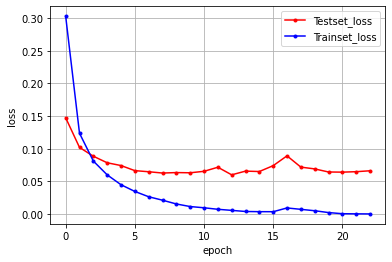

In [22]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")

plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc="upper right")

plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()